In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay, cKDTree
from matplotlib.lines import Line2D
import ForwardPassUtils as fpu

#132,7
np.random.seed(2)
nb_sites = 5
points = np.random.rand(nb_sites, 2)  # 10 sites initiaux
ind = np.lexsort((points[:, 1], points[:, 0]))
points = points[ind]

point_names = [f"s{i}" for i in range(nb_sites)]

voronoi_initial = Voronoi(points)

minX, maxX, minY, maxY = fpu.computeMinMax(voronoi_initial)

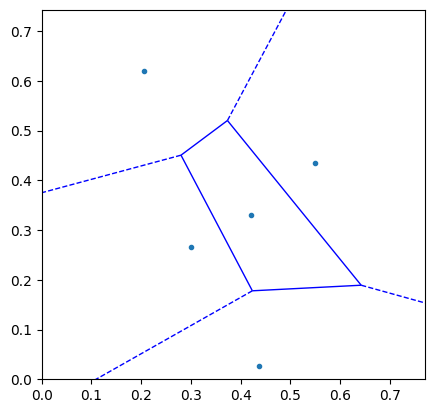

In [11]:
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=False, line_colors='blue')
plt.xlim(minX, maxX)
plt.ylim(minY, maxY)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('images/v1.png')
plt.show()

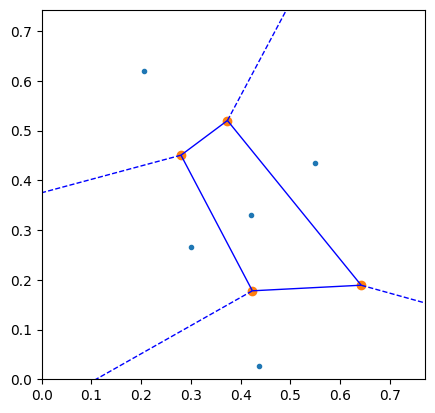

In [12]:
voronoi_initial = Voronoi(points)
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
plt.xlim(minX, maxX)
plt.ylim(minY, maxY)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('images/v2.png')
plt.show()

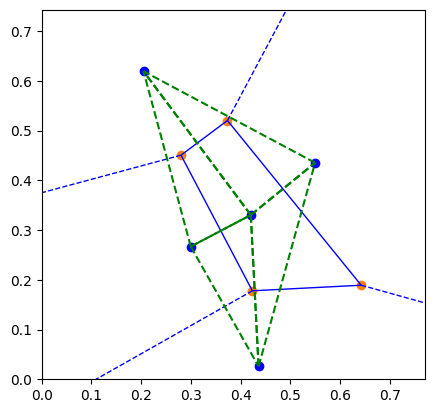

In [13]:

# Compute the Voronoi diagram
voronoi_initial = Voronoi(points)

# Compute the Delaunay triangulation
delaunay = Delaunay(points)

# Plot the Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')

# Plot the points
ax.plot(points[:, 0], points[:, 1], 'bo')

for simplex in delaunay.simplices:
    for i in range(len(simplex)):
        for j in range(i + 1, len(simplex)):
            p1 = points[simplex[i]]
            p2 = points[simplex[j]]
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'g--')

plt.xlim(minX, maxX)
plt.ylim(minY, maxY)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('images/v3.png')
plt.show()


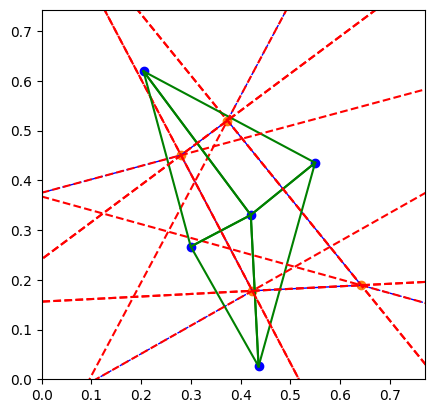

In [14]:
# Compute the Voronoi diagram
voronoi_initial = Voronoi(points)

# Compute the Delaunay triangulation
delaunay = Delaunay(points)

# Plot the Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')

# Plot the points
ax.plot(points[:, 0], points[:, 1], 'bo')

# Trace lines between the sites (Delaunay edges) and plot perpendicular bisectors
for simplex in delaunay.simplices:
    for i in range(len(simplex)):
        for j in range(i + 1, len(simplex)):
            p1 = points[simplex[i]]
            p2 = points[simplex[j]]
            # Plot the green line connecting the sites
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'g-')
            # Plot the perpendicular bisector
            fpu.plot_perpendicular_bisector(p1, p2, ax)

plt.xlim(minX, maxX)
plt.ylim(minY, maxY)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('images/v4.png')
plt.show()


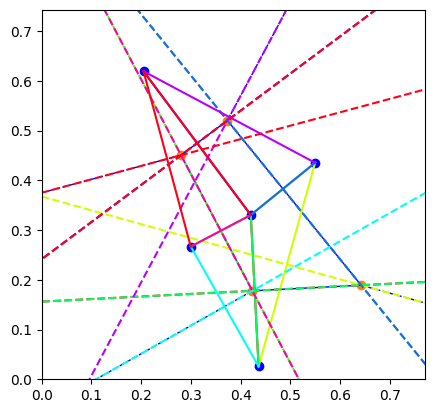

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay

# Compute the Voronoi diagram
voronoi_initial = Voronoi(points)

# Compute the Delaunay triangulation
delaunay = Delaunay(points)

# Plot the Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')

# Plot the points
ax.plot(points[:, 0], points[:, 1], 'bo')

# Use the HSV colormap to generate colors
cmap = plt.colormaps['hsv']

# Trace lines between the sites (Delaunay edges) and plot perpendicular bisectors
color_index = 0
for simplex in delaunay.simplices:
    for i in range(len(simplex)):
        for j in range(i + 1, len(simplex)):
            p1 = points[simplex[i]]
            p2 = points[simplex[j]]
            # Get a color from the colormap
            color = cmap(color_index)  # Normalized index
            color_index += .1
            # Plot the line connecting the sites
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], linestyle='-', color=color)
            # Plot the perpendicular bisector
            fpu.plot_perpendicular_bisector(p1, p2, ax, color=color)

plt.xlim(minX, maxX)
plt.ylim(minY, maxY)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('images/v5.png')
plt.show()


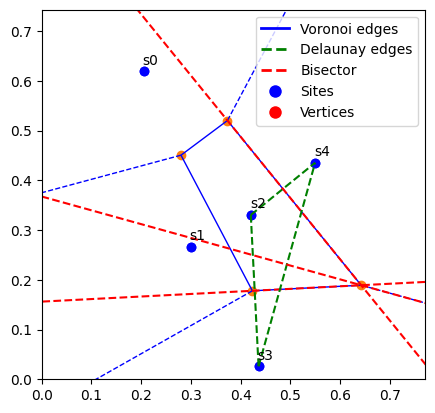

In [16]:
# Compute the Voronoi diagram
voronoi_initial = Voronoi(points)

# Compute the Delaunay triangulation
delaunay = Delaunay(points)

# Plot the Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')

# Plot the points
ax.plot(points[:, 0], points[:, 1], 'bo')

# Plot the points with labels
for i, (point, name) in enumerate(zip(points, point_names)):
    ax.plot(point[0], point[1], 'bo', label=f'Point {name}')
    ax.annotate(name, (point[0], point[1]), textcoords="offset points", xytext=(5, 5), ha='center')

# Trace lines between the sites (Delaunay edges) and plot perpendicular bisectors
for simplex in delaunay.simplices:
    for i in range(len(simplex)):
        for j in range(i + 1, len(simplex)):
            p1 = points[simplex[i]]
            p2 = points[simplex[j]]
            # Plot the green line connecting the sites
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'g--')
            # Plot the perpendicular bisector
            fpu.plot_perpendicular_bisector(p1, p2, ax)
    break

# Manually create legend handles
legend_elements = [Line2D([0], [0], color='blue', lw=2, label='Voronoi edges'),
                   Line2D([0], [0], linestyle='--', color='g', lw=2, label='Delaunay edges'),
                   Line2D([0], [0], linestyle='--', color='r', lw=2, label='Bisector'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='Sites'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Vertices')]

# Add the legend
ax.legend(handles=legend_elements, loc='upper right')

plt.xlim(minX, maxX)
plt.ylim(minY, maxY)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('images/v6.png')
plt.show()
